## Welcome to the First Exercise Block

In this example, we will go over the basics how to:

- Easily import files to [Google Colab](https://colab.research.google.com/).
- Extract the data using [Python](https://www.python.org/).
- Quickly make scientific plots (that look like we want).

Also, we have a look of some simple data treatment like:

- Calculating and depicting running and total averages.
- Making a histogram from the data.
- Perform some analysis via sigmoid and Gaussian fits.

The idea behind this data set is that we are running a series
of experiments that should maintain a constant temperature

The sensors give us one temperature measurement every minute. Let's see if our experiments were stable and start by uploading the temperature data files ...

In [ ]:
try:
    import google.colab
    USE_COLAB = True
except:
    USE_COLAB = False
if USE_COLAB:
    from google.colab import files
    uploaded = files.upload()
else:
    # CHANGE THIS TO YOUR LOCAL PATH
    #path =  "../../data/exercises/Temperature/"
    # path to github repo
    path = "https://raw.githubusercontent.com/stkroe/PythonForChemists/main/course/data/exercises/Temperature/"


ModuleNotFoundError: No module named 'google'

Alternatively, we could import via google.drive, but the hastasgs # indicate that the comment is inactive for now.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

## My First Plot (*zero difficulty*)

After uploading the files, we have to import key python modules:

- [NumPy](https://numpy.org/), a library for numerical analysiss
- [Matplotlib](https://matplotlib.org/), to generate the plots

Using NumPy (np) we can easily load the contents of file *Temperature_1.dat* into the array *data*.

An array is a container, which stores all entries on a grid. (Think of it as an advanced, interactive Excel sheet.)

The array *data* has two columns that can be accessed using *data[:, 0]* and *data[:, 1]*.

With this we can make our first xy-plot using:

*plt.plot(data[:, 0], data[:, 1], color='k', )*

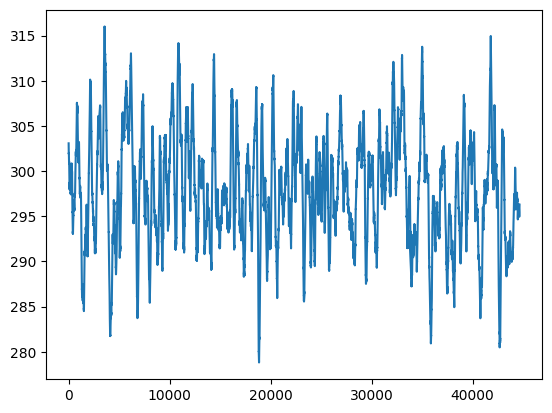

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data1 = np.loadtxt('Temperature_1.dat')

plt.plot(data1[:, 0], data1[:, 1])

## Customizing the Plots – Ticks, Labels and Fontsize (*very low difficulty*)

- Extract the data columns into separate arrays *time* and *temperature* (optional)

- Set up the plot by using the arrays time    and temperature – color *'k'* is black

- Adjust x- and y-range using *plt.xlim(min,max)* and *plt.ylim(min,max)*

- Use *plt.xticks()* to set the interval to 7200

  5 days $\cdot$ 24 hours $\cdot$ 60 min = 7200 min

- Add labels using *plt.xlabel()*, *plt.ylabel()* and *plt.title()*

  (use *fontsize =* to adjust the size)

- Use *plt.tick_params()* to increase the size of the tick labels using *labelsize = x*
- After adjusting all settings, bring it home using *plt.show()*

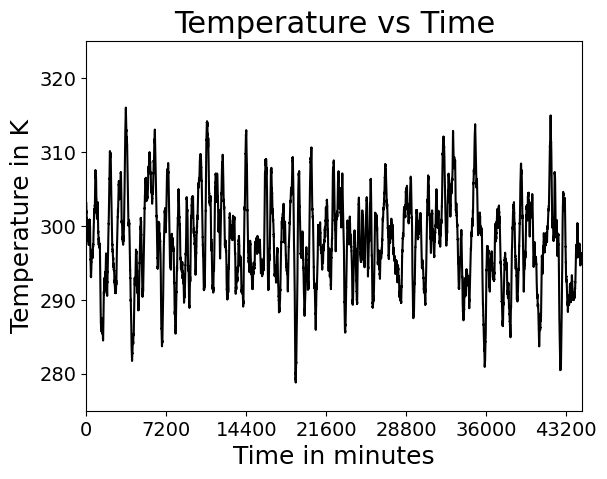

In [ ]:
# Alternatively, we can extract the data into separate array (optional)
time1 = data1[:, 0]
temperature1 = data1[:, 1]

# Setup the plot
plt.plot(time1, temperature1, color='k')

# Adjust x- and y-range
plt.xlim(0, 44640)
plt.ylim(275, 325)

# Adjust the tick spacing in x-axis
plt.xticks(np.arange(0, 44640, step=7200))  # ticks after 7200, 14400, 21600 minutes = 5, 10, 15, ... days

# Add labels and title, select font size
plt.xlabel('Time in minutes', fontsize=18)
plt.ylabel('Temperature in K', fontsize=18)
plt.title('Temperature vs Time', fontsize=22)

# Increase font size of axis labels
plt.tick_params(axis='both', labelsize=14)

# Plot the plot :)
plt.show()


## Further customization – adding averages (*low difficulty*)


- Change the x-axis from minutes to days

  *days = time / 60 / 24*

- Control the size of the plot using *plt.figure(figsize  = (x, y))*

- Add the average temperature using
   np.mean() and plt.achline()
- add a running average using a window size of 1000 points

  using *np.convolve()*

- Use different [colors](https://matplotlib.org/stable/gallery/color/named_colors.html) for the plots
  
  black: *color = 'k'*
  
  red: *color = 'r'*

  blue: *color = 'b'*

- Add a legend by adding *label = 'my label'*

- Adjust the axis range, labels and    fontsize as before

- When done, again: *plt.show()*


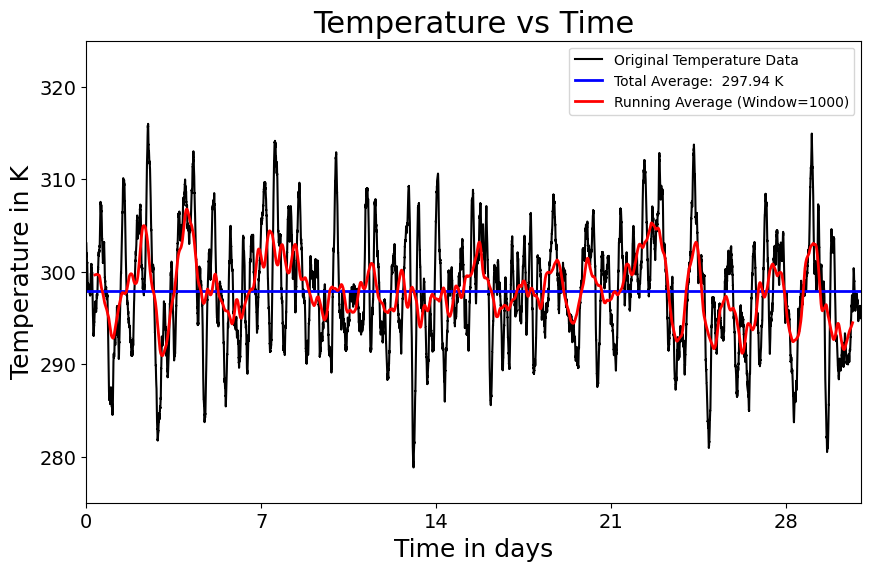

In [ ]:
# Calculate the time in days from minutes
days1 = time1 / 60 / 24

# Input the plot settings
plt.figure(figsize=(10, 6))

# Plot the original data
plt.plot(days1, temperature1, color='k',
         label='Original Temperature Data')

# Calculating the average requires only a single numpy command
temp1_avg = np.mean(temperature1)

# The total average is then ploted as a horizontal line
plt.axhline(y=temp1_avg, color='b', linewidth=2,
            label=f'Total Average: {temp1_avg: 4.2f} K')

# Calculate the running/moving average using np.convolve()
# using a window size of 1000
window = 1000

temp1_runavg = np.convolve(temperature1,
                            np.ones(window) / window,
                            mode='valid')

# Plot the running average
# the x-intervals are tricky, so this is for advanced users
plt.plot(days1[(window//2-1):(-window//2)], temp1_runavg,
                color='r', linewidth=2,
                label=f'Running Average (Window={window})')

# Adjust axis range, lables and fontsize as before

# Set the x- and y-ranges
# The x-axis is now in days
plt.xlim(0, 31)
plt.ylim(275, 325)

# Add labels and title
plt.xlabel('Time in days', fontsize=18)
plt.ylabel('Temperature in K', fontsize=18)
plt.title('Temperature vs Time', fontsize=22)

# Increase font size of axis labels
plt.tick_params(axis='both', labelsize=14)

# Adjust the tick spacing in x-axis
plt.xticks(np.arange(0, 31, step=7))  # ticks after 7, 14, 21, --- days

# Show a grid overlay (optional) and the legend
#plt.grid(True)
plt.legend()

# Plot the plot :)
plt.show()



## Data from Different Files (*low difficulty*)

- To import data from the other two files just re-use the commands from above.

- In this example, it is sufficient to only extract the y-data.

- We can even re-use the array *days* calculated above.

- We plot all three temperature arrays and assign different colors.

- Adjust the axis range, labels and
  fontsize as before.

- Place the legend into the upper left corner using *plt.legend(loc='upper left')*.

- When done, again: plt.show()

- OH NO! Experiment 3 is messed up!!

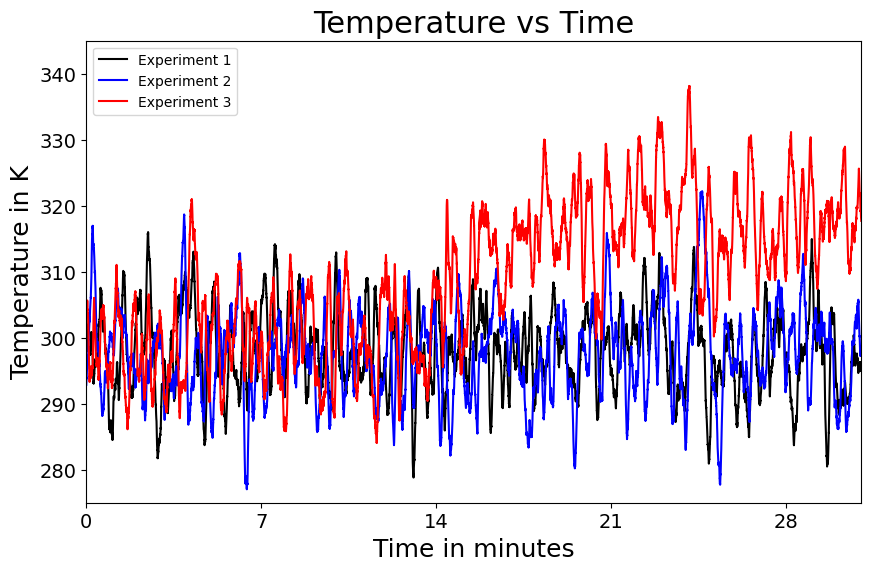

In [ ]:
# Extract data from the other files
data2 = np.loadtxt('Temperature_2.dat')
data3 = np.loadtxt('Temperature_3.dat')

# We only need the y-axis (temperature) of each data set
# because the time axis is the same for all three data sets
# i.e time1 = time 2 = time3 and days1 = days2 = days3
temperature2 = data2[:, 1]
temperature3 = data3[:, 1]

# Setup the plot
plt.figure(figsize=(10, 6))

# Simply plot the different temperature arrays one after the other
# We can reuse the array days from above
plt.plot(days1, temperature1, color='k', label = 'Experiment 1')
plt.plot(days1, temperature2, color='b', label = 'Experiment 2')
plt.plot(days1, temperature3, color='r', label = 'Experiment 3')


# Adjust axis range, lables and fontsize as before

# Set the x- and y-ranges
# The x-axis is still in days
plt.xlim(0, 31)
plt.ylim(275, 345)

# Add labels and title
plt.xlabel('Time in minutes', fontsize=18)
plt.ylabel('Temperature in K', fontsize=18)
plt.title('Temperature vs Time', fontsize=22)

# Increase font size of axis labels
plt.tick_params(axis='both', labelsize=14)

# Adjust the tick spacing in x-axis
plt.xticks(np.arange(0, 31, step=7))  # ticks after 7, 14, 21, --- days

# Show the legend in the upper left corner
plt.legend(loc='upper left')

# Plot the plot :)
plt.show()




## Data from Different Files in Different subplots (*low difficulty*)

- Plotting the data in different *subplots* of
   a single *figure* is very simple.

- Define a figure *fig* with three subplots
   being *ax1*, *ax2* and *ax3*.

- In this example, the subplot is composed of 3 rows and 1 column.

- For example *plt.subplots(2,2)* is composed of 2 rows and 2 columns.

- To customize provide commands separately for each subplot.

- Use for-loops to apply the same
   settings to different plots.

- Assign axis labels individually.

- <u>Careful:</u> Commands for subplots are a bit different from just a normal plot.


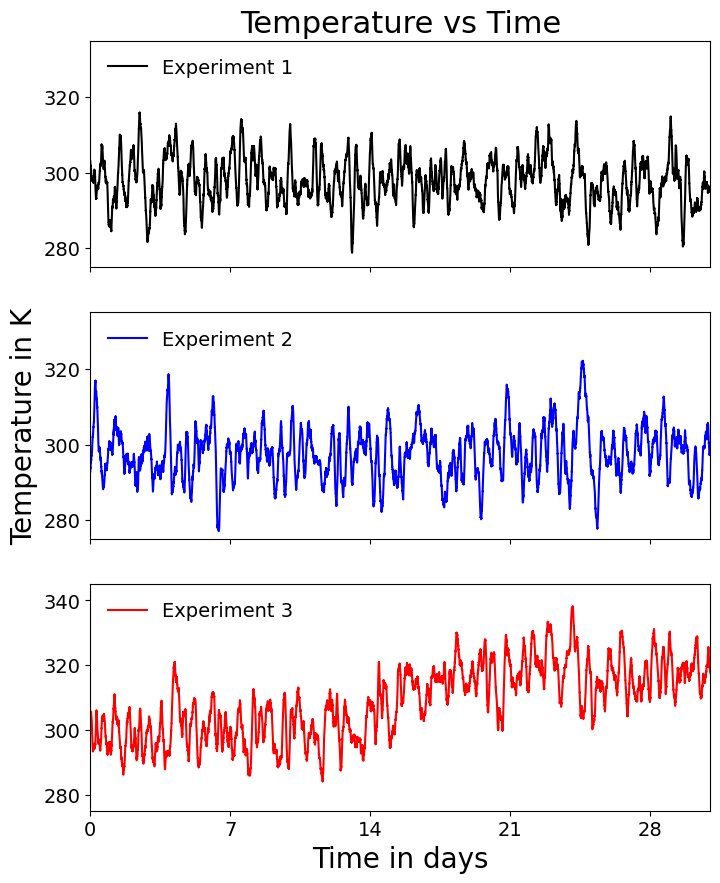

In [ ]:
# Set up the subplots -- 3 rows, one column
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(8, 10))

# Plot one data set per subplot
ax1.plot(days1, temperature1, color='k', label='Experiment 1')
ax2.plot(days1, temperature2, color='b', label='Experiment 2')
ax3.plot(days1, temperature3, color='r', label='Experiment 3')

# Set the same y-range individually for all plots
# Note: experiment 3 needs a different range than case 1 and 2
ax1.set_ylim(275, 335)
ax2.set_ylim(275, 335)
ax3.set_ylim(275, 345)

# Set the same x-range and x-ticks for all plots using a loop
# because all plots have the same settings
# Increase font size of axis labels
for i in [ax1, ax2, ax3]:
  i.set_xlim(0, 31)
  i.set_xticks(np.arange(0, 31, step=7))  # ticks after 7, 14, 21, --- days
  i.tick_params(axis='both', labelsize=14)
  i.legend(loc='upper left', frameon=False, fontsize = 14)


# Add labels and title
ax1.set_title('Temperature vs Time', fontsize=22)
ax2.set_ylabel('Temperature in K', fontsize=20)
ax3.set_xlabel('Time in days', fontsize=20)

# Remove x-tick labels for plots 1 and 2
ax1.set_xticklabels([])
ax2.set_xticklabels([])

# Done :)
plt.show()


## Sigmoid Curve Fitting

Let's analyze how bad the situation is in experiment 3 is. To do this, we will fit a sigmoid curve to the data set using *curve_fit()* from the [SciPy](https://scipy.org/) module *scipy.optimize*.

In our case the sigmoid function is given by:

$$
T(t) = T_0 + \Delta T \frac{1}{1 + e^{-a (t - t_0)}}
$$

with the four fitting parameters being:
- temperature baseline $ T_0 $,
- the temperature increase $ \Delta T $ ,
- the growth rate $ a $ ,
- the time at the midpoint of the temperature increase $ t_0 $

After fitting the curve, we can plot and
overlay it with the original data for
comparison.

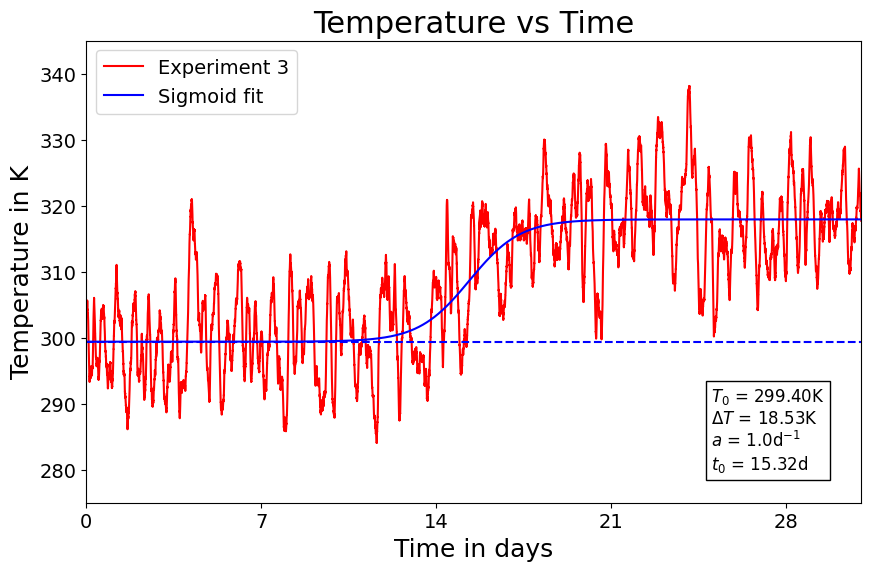

In [ ]:
# Generate the Gaussian curve employing the fitted parameters
from scipy.optimize import curve_fit

# Define the sigmoid function
def sigmoid(t, T0, dT, a, t0):
  return T0 + dT / (1 + np.exp(-a * (t - t0)))

# Fit the curve
# When fitting non-linear curves suitable startting values have to be provided for
# T_0, dT, a and t0 in the array p0
fit_result, _ = curve_fit(sigmoid, days1, temperature3, p0=[298, 20, 0.1, 10])

# Extract fitted parameters
T0_fit, dT_fit, a_fit, t0_fit = fit_result

# Calculate the fit-curve to overlay
T_sigmoid = sigmoid(days1, T0_fit, dT_fit, a_fit, t0_fit)

# Setup the plot
plt.figure(figsize=(10, 6))

# Plot original data vs fit data
plt.plot(days1, temperature3, color='r', label = "Experiment 3" )
plt.plot(days1, T_sigmoid, color='b',  label = "Sigmoid fit" )

# The baseline value is plotted as a horizontal, dashed line
plt.axhline(y=T0_fit, color='b', linestyle = '--' )

# Adjust axis range, lables and fontsize as before

# Add labels and title
plt.xlabel('Time in days', fontsize=18)
plt.ylabel('Temperature in K', fontsize=18)
plt.title('Temperature vs Time', fontsize=22)

# set limits
plt.xlim(0, 31)
plt.ylim(275, 345)

# Increase font size of axis labels
plt.tick_params(axis='both', labelsize=14)

# Adjust the tick spacing in x-axis
plt.xticks(np.arange(0, 31, step=7))  # ticks after 7, 14, 21, --- days

# Plot the plot :)
plt.legend(loc="upper left", fontsize = 14)

# Add a textbox showing the four fit parameters
# Getting the correct format script is very advanced
# Here, AI models can help a lot!
plt.text(25, 280, f'$T_0$ = {T0_fit:.2f}K\n$\Delta T$ = {dT_fit:.2f}K\n$a$ = {a_fit:.1f}d$^{{-1}}$\n$t_0$ = {t0_fit:.2f}d', fontsize=12, bbox=dict(facecolor='white'))

# Plot the plot :)
plt.show()



In [ ]:
from scipy.stats import norm

nbin = 50

# Set up the subplot -- one row, two columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)

# Generate a histogram from the temperature Data
ax1.hist(temperature1, bins=nbin, density=True, color='white',edgecolor='red', label=f'Histogram (Nbins= {nbin})')
ax2.hist(temperature2, bins=nbin, density=True, color='white', edgecolor='blue', label=f'Histogram (Nbins= {nbin})')
ax3.hist(temperature3, bins=nbin, density=True, color='white', edgecolor='green', label=f'Histogram (Nbins= {nbin})')

# Fit a normal (= Gaussian) distribution to the data
# yielding the mean and standard deviation stddev
mean1, stddev1 = norm.fit(temperature1)
mean2, stddev2 = norm.fit(temperature2)

# Set limits of the axes before calculating the histogram

ax3.set_xlim(275, 320)
ax3.set_ylim(-0.002, 0.10)

# Generate the Gaussian curve employing the fitted parameters
xmin, xmax = ax1.get_xlim()  # Get the limits of the x-axis
x1 = np.linspace(xmin, xmax, 1000)  # Create an array of x values with 1000 datapoint in the range [xmin, xmax]
p1 = norm.pdf(x1, mean1, stddev1)  # Probability density function (PDF) of the normal distribution
ax1.plot(x1, p1, 'r-', label=f'Gaussian Fit: {mean1:.1f} ± {stddev1:.1f} K', linewidth=2)

# Generate the Gaussian curve employing the fitted parameters
xmin, xmax = ax2.get_xlim()  # Get the limits of the x-axis
x2 = np.linspace(xmin, xmax, 1000)  # Create an array of x values with 1000 datapoint in the range [xmin, xmax]
p2 = norm.pdf(x2, mean2, stddev2)  # Probability density function (PDF) of the normal distribution
ax2.plot(x2, p2, 'b-', label=f'Gaussian Fit: {mean2:.1f} ± {stddev2:.1f} K', linewidth=2)

# Calculating the average to double check the Gaussian result
# requires only a single numpy command
temp1_avg = np.mean(temperature1)
temp2_avg = np.mean(temperature2)
temp3_avg = np.mean(temperature3)

# Plot the average as black, dashed vertical lines
# This time we give detailed instruction about the start and end points
ax1.plot([temp1_avg, temp1_avg], [0, norm.pdf(temp1_avg, mean1, stddev1)], color='k', linestyle = '--', linewidth=2.5,  label=f'Average = {temp1_avg:.1f}K')
ax2.plot([temp2_avg, temp2_avg], [0, norm.pdf(temp2_avg, mean2, stddev2)], color='k', linestyle = '--', linewidth=2.5,  label=f'Average = {temp2_avg:.1f}K')
ax3.plot([temp3_avg, temp3_avg], [0, norm.pdf(temp3_avg, mean2, stddev2)], color='k', linestyle = '--', linewidth=2.5,  label=f'Average = {temp3_avg:.1f}K')
# Adjust axis range, lables and fontsize as before

# Set labels and fontsizes
ax1.set_xlabel('Temperature', fontsize=18)
ax1.set_ylabel('Probability', fontsize=18)

ax2.set_xlabel('Temperature', fontsize=18)
ax2.yaxis.set_label_position('right')
ax2.set_ylabel('Probability', fontsize=18)
ax2.yaxis.tick_right()

ax1.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='both', labelsize=14)

# Show grid and legend
ax1.legend(frameon = False, loc = 'upper left')
ax2.legend(frameon = False, loc = 'upper left')

# Display the plot
plt.show()



NameError: name 'plt' is not defined